# Hands-On Data Preprocessing in Python
Learn how to effectively prepare data for successful data analytics
    
    AUTHOR: Dr. Roy Jafari 

### Chapter 11: Data Cleaning - Level ⅠⅡ 
#### Excercises

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Excercise 1
In this exercise, we will be using 'Temperature_data.csv'. This dataset has some missing values. Do the following.

    a. After reading the file into a Pandas DataFrame, check if the dataset is level Ⅰ clean and if not clean it. Also, describe the cleanings if any.

In [56]:
day_df = pd.read_csv('Temperature_data.csv')
day_df.info()
day_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Site                     365 non-null    object 
 1   Species                  365 non-null    object 
 2   ReadingDateTime          365 non-null    object 
 3   Value                    351 non-null    float64
 4   Units                    365 non-null    object 
 5   Provisional or Ratified  365 non-null    object 
dtypes: float64(1), object(5)
memory usage: 17.2+ KB


,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,RI2,TMP,1/1/2019 0:00,9.0,oC,P
1,RI2,TMP,2/1/2019 0:00,6.0,oC,P
2,RI2,TMP,3/1/2019 0:00,5.0,oC,P
3,RI2,TMP,4/1/2019 0:00,4.0,oC,P
4,RI2,TMP,5/1/2019 0:00,5.0,oC,P
...,...,...,...,...,...,...
360,RI2,TMP,27/12/2019 00:00,8.0,oC,P
361,RI2,TMP,28/12/2019 00:00,9.0,oC,P
362,RI2,TMP,29/12/2019 00:00,8.0,oC,P
363,RI2,TMP,30/12/2019 00:00,7.0,oC,P


In [57]:
day_df['ReadingDateTime'] =pd.to_datetime(day_df.ReadingDateTime)
tmp = day_df["ReadingDateTime"].dt.date
day_df.insert(3, "ReadingDate", tmp)
tmp2 = day_df["ReadingDateTime"].dt.time
day_df.insert(4, "Time", tmp2)
day_df.drop(columns=["ReadingDateTime"], inplace=True)
day_df

,Site,Species,ReadingDate,Time,Value,Units,Provisional or Ratified
0,RI2,TMP,2019-01-01,00:00:00,9.0,oC,P
1,RI2,TMP,2019-02-01,00:00:00,6.0,oC,P
2,RI2,TMP,2019-03-01,00:00:00,5.0,oC,P
3,RI2,TMP,2019-04-01,00:00:00,4.0,oC,P
4,RI2,TMP,2019-05-01,00:00:00,5.0,oC,P
...,...,...,...,...,...,...,...
360,RI2,TMP,2019-12-27,00:00:00,8.0,oC,P
361,RI2,TMP,2019-12-28,00:00:00,9.0,oC,P
362,RI2,TMP,2019-12-29,00:00:00,8.0,oC,P
363,RI2,TMP,2019-12-30,00:00:00,7.0,oC,P


The dataset needs level 1 clean because it is a standard data structure, but didn't have intuitative and codable column titles. However, every row did have a unique identifier.

    b. Check if the dataset is level Ⅱ clean and if not clean it. Also, describe the cleanings if any.

In [58]:
day_df.ReadingDate = pd.to_datetime(day_df.ReadingDate, format='%Y-%m-%d')
tmp = day_df["ReadingDate"].dt.year
day_df.insert(3, "Year", tmp)
tmp2 = day_df["ReadingDate"].dt.month
day_df.insert(4, "Month", tmp2)
tmp3 = day_df["ReadingDate"].dt.day
day_df.insert(5, "Day", tmp3)
day_df.drop(columns=["ReadingDate"], inplace=True)
day_df

,Site,Species,Year,Month,Day,Time,Value,Units,Provisional or Ratified
0,RI2,TMP,2019,1,1,00:00:00,9.0,oC,P
1,RI2,TMP,2019,2,1,00:00:00,6.0,oC,P
2,RI2,TMP,2019,3,1,00:00:00,5.0,oC,P
3,RI2,TMP,2019,4,1,00:00:00,4.0,oC,P
4,RI2,TMP,2019,5,1,00:00:00,5.0,oC,P
...,...,...,...,...,...,...,...,...,...
360,RI2,TMP,2019,12,27,00:00:00,8.0,oC,P
361,RI2,TMP,2019,12,28,00:00:00,9.0,oC,P
362,RI2,TMP,2019,12,29,00:00:00,8.0,oC,P
363,RI2,TMP,2019,12,30,00:00:00,7.0,oC,P


The dataset needs level 2 clean because it had a ReadingDate column that contained the months, days, and years of all the values. So I separate them into 3 columns.

    c.	The dataset has missing values. See how many, and run diagnosis to see what types of missing values they are. 

In [59]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Site                     365 non-null    object 
 1   Species                  365 non-null    object 
 2   Year                     365 non-null    int64  
 3   Month                    365 non-null    int64  
 4   Day                      365 non-null    int64  
 5   Time                     365 non-null    object 
 6   Value                    351 non-null    float64
 7   Units                    365 non-null    object 
 8   Provisional or Ratified  365 non-null    object 
dtypes: float64(1), int64(3), object(5)
memory usage: 25.8+ KB


There are missing values and they're all from the values column. About 14 total missing values from our dataset

    d. Are there any outliers in the dataset?

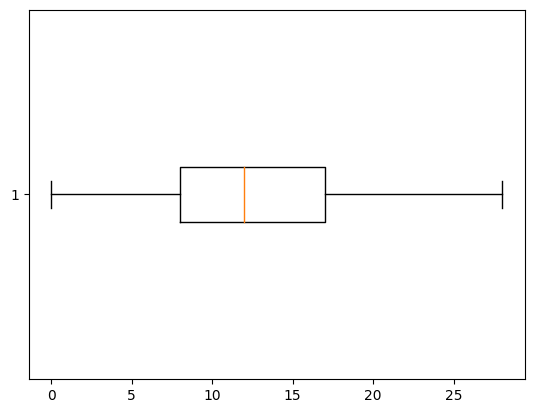

In [62]:
fig = plt.boxplot(day_df.Value.dropna(),vert=False)

There are no outliers in this dataset.

    e.	How should we best deal with the missing values if our goal is to draw multiple boxplots that show the central tendency and variation of temperature across the months? Draw the described visualization after dealing with the missing values. 

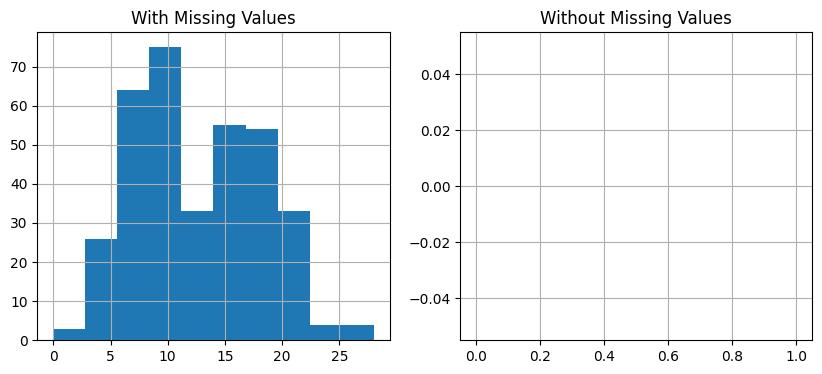

In [63]:
BM_MV = day_df.Value.isna()
temp_range = (day_df.Value.min(),day_df.Value.max())
MV_labels = ['With Missing Values','Without Missing Values']

plt.figure(figsize=(10,4))

for i,poss in enumerate(BM_MV.unique()):
    plt.subplot(1,2,i+1)
    BM = BM_MV == poss
    day_df[BM].Value.hist()
    plt.xlim = temp_range
    plt.title(MV_labels[i])

plt.show()

The number of missing values are so small that even without them, the overall outcome wouldn't really change. 

# Excercise 2
In this exercise, we are going to use the file ‘Iris_wMV.csv’. Iris data includes 50 samples of three types of iris flowers, totaling 150 rows of data. Each flower is described by its sepal and petal length or width. The column PetalLengthCm has some missing values.

    a. Confirm that PetalLengthCm has five missing values.  

    b. Figure out the types of missing values (MCAR, MAR, MNAR).

    c.	How would you best deal with the missing values, if your end goal was to draw the following visualization? Comment on all the four different approaches of dealing with missing values in this chapter, citing why the approach would be or wouldn’t be appropriate.

d.	Draw the preceding figure twice, once after adopting the “keep as is” approach, and once after adopting “imputing with the central tendency of the appropriate iris Species”. Compare the two figures and comment on their differences.

# Excercise 3
In this exercise, we will be using ‘imdb_top_1000.csv’. More information about this dataset maybe found on this link: https://www.kaggle.com/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows. Perform the following steps for this dataset. 

    a.	Read the file into movie_df, and list the level Ⅰ data cleaning steps that the dataset needs. Implement the listed items, if any. 

In [ ]:
movie_df = pd.read_csv('imdb_top_1000.csv')
movie_df.head(1)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"


    b.	We want to employ a Decision Tree Classificaiton algorithm using the following columns to predict the IMDB_rating: Certificate, Runtime, Genre, and Gross. For this analytics goals, list the level 2 data cleanings that need to be done, and then implement them.  

    c.	Does the dataset have issues, regarding missing values? If yes, how best should we deal with them given the listed data analytic goals in b. 

    d.	Use the following function from sklearn.tree to create a prediction model that can predict IMDB_rating using Certificate, Runtime, Genre and Gross: 
    
*DecisionTreeRegressor(max_depth=5, min_impurity_decrease=0, min_samples_split=20, splitter='random')*

    The tuning parameters have been set for you so the DecsionTreeRegressor can perform better. Once the model is trained draw the trained tree and check if the attribute Gross is used for the prediction of IMDB_rating. 

    e.	Run the following code and then explain what summary_df is.

`
dt_predicted_IMDB_rating = RegressTree.predict(Xs)
mean_predicted_IMDB_rating = np.ones(len(y))*y.mean()
summary_df = pd.DataFrame({'Prediction by Decision Tree': dt_predicted_IMDB_rating, 'Prediction by mean': mean_predicted_IMDB_rating, 'Actual IMDB_rating': y})
`

    f.	Run the following code and explain the visualizaiton it creates. What can you learn from the visualization? 

`summary_df['Decision Tree Error'] = abs(summary_df['Prediction by Decision Tree']- summary_df['Actual IMDB_rating'])
summary_df['Mean Error'] = abs(summary_df['Prediction by mean'] - summary_df['Actual IMDB_rating'])
plt.figure(figsize=(2,10))
table = summary_df[['Decision Tree Error','Mean Error']]
sns.heatmap(table, cmap='Greys')`

# Excercise 4
In this exercise, we will be using two CSV files: responses.csv and columns.csv. The two files are used to record the date of a survey conducted in Slovakia. To access the data on Kaggle.com use this link: https://www.kaggle.com/miroslavsabo/young-people-survey. Perform the following items for this data source. 

In [ ]:
column_df = pd.read_csv('columns.csv')
column_df.head(2)

,original,short
0,I enjoy listening to music.,Music
1,I prefer.,Slow songs or fast songs


In [ ]:
response_df = pd.read_csv('responses.csv')
response_df.head(2)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats


    a.	Are there respondents in this survey that are suspected to be outliers based on their age? How many? list them in a separate data frame.

    b.	Are there respondents in this survey that are suspected to be outliers based on their level of liking for Country and Hardrock music? How many? list them in a separate data frame.

	c. Are there respondents in this survey that are suspected to be outliers based on their BMI or Education level? How many? list them in a separate data frame. BMI can be calculated using the following formula. 
    
`BMI=Weight/Height^2`

    The Weight has to be in kilograms and height in meters for the following formula. In the dataset, Weight is recorded in kilograms but Height is recorded in centimeters and has to be transformed to Meter.


    d.	Are there respondents in this survey that are suspected to be outliers based on their BMI and Age? How many? list them in a separate data frame.

    e.	Are there respondents in this survey that are suspected to be outliers based on their BMI and Gender? How many? list them in a separate data frame.

# Excercise 5
One of the most common approaches for fraud detection is using outlier detection. In this exercise, you will use 'creditcard.csv' from https://www.kaggle.com/mlg-ulb/creditcardfraud  to evaluate the effectiveness of outlier detection for credit card fraud detection. Pay attention that most of the columns in this data source are processed values to uphold data anonymity. Perform the following steps.

    a.	Check the state of the dataset for missing values and address them if any.

In [ ]:
transaction_df = pd.read_csv('creditcard.csv')
transaction_df

    b.	Using the column Class, which shows if the transaction has been fraudulent or not, find out what percentage of the transactions in the dataset are fraudulent. 

    c.	Using data visualization or the appropriate statistical set, and if necessary both, specify which univariate outliers have a relationship with the column Class? In other words, if the values of which column are outliers then we may suspect fraudulent activity? Which statistical test is appropriate here? 

    d.	First, use the K-Means algorithm to group the transactions into 200 clusters by the attributes that were found to have a relationship with the column Class in part c. Then, filter out the members of the clusters with less than 50 transactions. Does any of them contain significantly fraudulent transactions? 

    e.	If there are any clusters with significant fraudulent transactions, perform centroid analysis for them. 

# Excercise 6
In Chapter 5 and Chapter 8 we used ‘WH Report_preprocessed.csv’ which is the preprocessed version of ‘WH Report.csv’. Now that you have learned numerous data preprocessing skills, you will be preprocessing the dataset yourself.

    a.	Check the status of the dataset for missing values. 

In [ ]:
country_df = pd.read_csv('WH Report.csv')
country_df

    b.	Check the status of the dataset for outliers.

    c.	We would like to cluster the countries based on their happiness indices over the years. Based on these analytic goals, address the missing values.

    d.	Based on the listed goal in c, address the outliers.

    e.	Does data need any level Ⅰ or level Ⅱ data cleaning, before clustering is possible? If any, prepare the dataset for k-means clustering.

    f.	Perform K-means clustering to separate the countries into three groups, and do all the possible analytics that one does when clustering.

# Excercise 7

Specify if the following items describe random errors or systematic errors.

    a.	The data has these types of errors as the thermometer that the lab has purchased can give precise readings to one-thousandth of a degree
    b.	The data has these types of errors the survey records were gathered by 5 different surveyors who attended 5 rigorous training sessions
    c.	The data has these types of errors because when asking for salary questions in a survey there were no options such as “I would not like to share”
    d.	The data has these types of errors because the cameras were tampered with so the rubbery would not be tapped. 


# Excercise 8
Study Figure 11.14 one more time, and run the first three Exercises by the flowchart in this figure and note down the path that led to our decisions regarding the missing values. Did we take steps in dealing with missing values that were not listed in this figure or this chapter? Would it be better to have a more complex figure so every possibility would be included, or not? Why or why not?

# Excercise 9
Explain why the following statement is incorrect: A row may have a significant number of MCAR missing values.